In [1]:
import numpy as np
from scipy.linalg import solve
import matplotlib.pyplot as plt
#matplotlib widget

In [2]:
class cptKp1d: #cubic polynomial trajectory
    def __init__(self,t0,tf,q0,v0,qf,vf):
        self.t0=t0
        self.tf=tf
        self.q0=q0
        self.v0=v0
        self.qf=qf
        self.vf=vf
        # Ax=b
        self.A = np.array([[1, t0, t0**2, t0**3], [0, 1, 2*t0, 3*t0**2],[1, tf, tf**2, tf**3], [0, 1, 2*tf, 3*tf**2]])
        self.b = np.array([q0,v0,qf,vf])
        self.x = solve(self.A, self.b)
    q  = lambda self,t : self.x[0]+self.x[1]*t+self.x[2]*t**2+self.x[3]*t**3
    qd = lambda self,t : self.x[1]+2*self.x[2]*t+3*self.x[3]*t**2
    qdd= lambda self,t : 2*self.x[2]*t+6*self.x[3]*t

In [3]:
class cptKp1d: #minimum jerk trajectory, with zero accel
    def __init__(self,t0,tf,q0,v0,qf,vf):
        self.t0=t0
        self.tf=tf
        self.q0=q0
        self.v0=v0
        self.qf=qf
        self.vf=vf
        a0=0
        af=0
        # Ax=b
        self.A = np.array([
            [1, t0, t0**2, t0**3, t0**4, t0**5], 
            [0, 1, 2*t0, 3*t0**2, 4*t0**3, 5*t0**4], 
            [0, 0, 2, 6*t0, 12*t0**2, 20*t0**3],
            [1, tf, tf**2, tf**3, tf**4, tf**5], 
            [0, 1, 2*tf, 3*tf**2, 4*tf**3, 5*tf**4], 
            [0, 0, 2, 6*tf, 12*tf**2, 20*tf**3]])
        self.b = np.array([q0,v0,a0,qf,vf,af])
        self.x = solve(self.A, self.b)
    q  = lambda self,t : self.x[0]+self.x[1]*t+self.x[2]*t**2+self.x[3]*t**3+self.x[4]*t**4+self.x[5]*t**5
    qd = lambda self,t : self.x[1]+2*self.x[2]*t+3*self.x[3]*t**2+4*self.x[4]*t**3+5*self.x[5]*t**4
    qdd= lambda self,t : 2*self.x[2]*t+6*self.x[3]*t+12*self.x[4]*t**2+20*self.x[5]*t**4
    qddd=lambda self,t : 6*self.x[3]+24*self.x[4]*t+60*self.x[5]*t**2

In [475]:
pt1=[cptKp1d(0,1.5,0,0,1,0), cptKp1d(0,1.5,0,0,0.1,0)]

In [36]:
tvec= np.linspace(pt1[0].t0,pt1[0].tf,10)


plt.close('all')
fig, ax = plt.subplots(nrows=1,ncols=3, figsize=(12,4))
thisAx = ax[0]
thisAx.plot(pt1[1].q(tvec), pt1[0].q(tvec))
thisAx.set_aspect(2)
thisAx = ax[1]
thisAx.plot(tvec, pt1[0].qd(tvec))
thisAx = ax[2]
thisAx.plot(tvec, pt1[0].qdd(tvec))
fig.tight_layout()
fig.show()

NameError: name 'pt1' is not defined

In [66]:
kp_t = [0.0, 5.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 5.0] #dT
kp_t_nn=[]
for i in range(len(kp_t)):
    kp_t_nn.append(np.sum((kp_t[:i+1])))
kp_t=kp_t_nn.copy()
print(kp_t)

[0.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 18.0]


In [4]:
# control path generation
kp_x = [2.0, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 2.0]
kp_y = [0.0, 1.0, 0.8, 1.0, 0.8, 1.0, 0.8, 1.0, 0.8, 1.0, 0.0]
pd = 0.5
kpd_x= [0.0, 0.0,  pd, 0.0,  pd, 0.0,  pd, 0.0,  pd, 0.0, 0.0] #start speed
kpd_y= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] #start speed
dt = 1.0
kp_t = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0] #dT

kp_t = [0.0, 5.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0] #dT
kp_t_nn=[]
for i in range(len(kp_t)):
    kp_t_nn.append(np.sum((kp_t[:i+1])))
kp_t=kp_t_nn.copy()


gasSrc_x = [0.0, 1.0, 2.0, 3.0, 4.0] 
gasSrc_y = [1.2, 1.2, 1.2, 1.2, 1.2] 
#t0,tf,q0,v0,qf,vf
planning = []
for i in range(len(kp_x)-1):
    planning.append([cptKp1d(kp_t[i],kp_t[i+1],kp_x[i],kpd_x[i],kp_x[i+1],kpd_x[i+1]), cptKp1d(kp_t[i],kp_t[i+1],kp_y[i],kpd_y[i],kp_y[i+1],kpd_y[i+1])])
limd_x = 0.5
limd_y = 0.9

C:\Users\Jonathan\AppData\Local\Temp/ipykernel_17052/3772357963.py:51: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


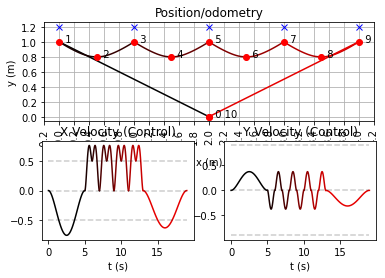

In [5]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
plt.close('all')
fig = plt.figure() #constrained_layout=True
gs = fig.add_gridspec(2, 2)
ax=[]
ax.append(fig.add_subplot(gs[0, :]))
ax.append(fig.add_subplot(gs[1, 0]))
ax.append(fig.add_subplot(gs[1, 1]))
#fig, ax = plt.subplots(nrows=1,ncols=3, figsize=(12,4))

for i in range(len(planning)):
    color=[i/len(planning),0,0]
    tvec = np.linspace(planning[i][0].t0,planning[i][0].tf,100)
    thisAx = ax[0]
    thisAx.plot(planning[i][0].q(tvec), planning[i][1].q(tvec), color=color)
    thisAx.text(kp_x[i], kp_y[i], '  '+str(i))
    thisAx = ax[1]
    thisAx.plot(tvec, planning[i][0].qd(tvec), color=color)
    #thisAx.plot(tvec, planning[i][1].qd(tvec), color=color)
    thisAx = ax[2]
    thisAx.plot(tvec, planning[i][1].qd(tvec), color=color)
    #thisAx.plot(tvec, planning[i][0].qdd(tvec), color=color)

thisAx = ax[0]

thisAx.plot(kp_x, kp_y, 'ro')
thisAx.text(kp_x[-1], kp_y[-1], '     '+str(i+1))
thisAx.plot(gasSrc_x, gasSrc_y, 'bx')
thisAx.grid()
thisAx.xaxis.set_major_locator(MultipleLocator(0.2))
thisAx.yaxis.set_major_locator(MultipleLocator(0.2))
thisAx.xaxis.set_tick_params(rotation=90)
thisAx.set_aspect(1)

thisAx.set_title("Position/odometry")
thisAx.set_xlabel('x (m)')
thisAx.set_ylabel('y (m)')
thisAx = ax[1]
thisAx.set_title("X Velocity (Control)")
thisAx.set_xlabel('t (s)')
thisAx.plot([kp_t[0], kp_t[-1]], [0,0], 'k--', alpha=0.2)
thisAx.plot([kp_t[0], kp_t[-1]], [ limd_x, limd_x], 'k--', alpha=0.2)
thisAx.plot([kp_t[0], kp_t[-1]], [-limd_x,-limd_x], 'k--', alpha=0.2)
thisAx = ax[2]
thisAx.set_title("Y Velocity (Control)")
thisAx.set_xlabel('t (s)')
thisAx.plot([kp_t[0], kp_t[-1]], [0,0], 'k--', alpha=0.2)
thisAx.plot([kp_t[0], kp_t[-1]], [ limd_y, limd_y], 'k--', alpha=0.2)
thisAx.plot([kp_t[0], kp_t[-1]], [-limd_y,-limd_y], 'k--', alpha=0.2)
#fig.tight_layout()
fig.show()

In [5]:
import sympy as sp
noOrder,noDiff = 6, 3 #jerk, acceleration
a = sp.symbols('a:'+str(noOrder))
t = sp.symbols('t')

expression=0
for i,aa in enumerate(a):
    expression+=aa*(t**i)
print(expression)
for i in range(2):
    expression = expression.diff(t)  
    print(expression)
expression = sp.Poly(expression, t)

a0 + a1*t + a2*t**2 + a3*t**3 + a4*t**4 + a5*t**5
a1 + 2*a2*t + 3*a3*t**2 + 4*a4*t**3 + 5*a5*t**4
2*a2 + 6*a3*t + 12*a4*t**2 + 20*a5*t**3


In [241]:
import sympy as sp
noOrder,noDiff = 6, 3 #jerk, acceleration
t = sp.symbols('t')
a = sp.symbols('a:'+str(noOrder))

expression=0
for i,aa in enumerate(a):
    expression+=(t**i)
#print(expression)
A = []
A.append(sp.Poly(expression, t).coeffs())
for i in range(noDiff-1):
    expression = expression.diff(t)  
    #print(expression)
    subLst = sp.Poly(expression, t).coeffs()
    for zero in range(i+1): #zero padding
        subLst=subLst+[0]
    subLst.reverse()
    A.append(subLst)
A=np.array(A)
print(A)

[[1 1 1 1 1 1]
 [0 1 2 3 4 5]
 [0 0 2 6 12 20]]


In [242]:
t_matrix = []
t_vector = []

for j in range(noDiff):
    t_vector=[]
    for i in range(j):
        t_vector.append(0)
    for i in range(noOrder-j):
        t_vector.append(t**i)
    t_matrix.append(t_vector)
t_matrix=np.array(t_matrix)
print(t_matrix)

[[1 t t**2 t**3 t**4 t**5]
 [0 1 t t**2 t**3 t**4]
 [0 0 1 t t**2 t**3]]


In [243]:
t0=sp.symbols('t_0')
tf=sp.symbols('t_f')
sp.Array(np.concatenate((sp.Array(A*t_matrix).replace(t,t0), sp.Array(A*t_matrix).replace(t,tf)), axis=0))

[[1, t_0, t_0**2, t_0**3, t_0**4, t_0**5], [0, 1, 2*t_0, 3*t_0**2, 4*t_0**3, 5*t_0**4], [0, 0, 2, 6*t_0, 12*t_0**2, 20*t_0**3], [1, t_f, t_f**2, t_f**3, t_f**4, t_f**5], [0, 1, 2*t_f, 3*t_f**2, 4*t_f**3, 5*t_f**4], [0, 0, 2, 6*t_f, 12*t_f**2, 20*t_f**3]]

In [479]:
# Minimum jerk trajectory
def mjtg(current, setpoint, frequency, move_time):
    trajectory = []
    trajectory_derivative = []
    timefreq = int(move_time * frequency)

    for time in range(1, timefreq):
        trajectory.append(
            current + (setpoint - current) *
            (10.0 * (time/timefreq)**3
             - 15.0 * (time/timefreq)**4
             + 6.0 * (time/timefreq)**5))

        trajectory_derivative.append(
            frequency * (1.0/timefreq) * (setpoint - current) *
            (30.0 * (time/timefreq)**2.0
             - 60.0 * (time/timefreq)**3.0
             + 30.0 * (time/timefreq)**4.0))

    return np.array(trajectory), np.array(trajectory_derivative)

In [481]:
# Set up and calculate trajectory.
current = 0
setpoint = 1
frequency = 100
time = 3

traj, traj_vel = mjtg(current, setpoint, frequency, time)

# Create plot.
xaxis = [i / frequency for i in range(1, int(time * frequency))]

plt.close('all')
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(4,4))
thisAx = ax

thisAx.plot(xaxis, traj)
thisAx.plot(xaxis, traj_vel)
# thisAx.title("Minimum jerk trajectory")
# thisAx.xlabel("Time [s]")
# thisAx.ylabel("Angle [deg] and angular velocity [deg/s]")
thisAx.legend(['pos', 'vel'])
fig.tight_layout()
fig.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [483]:
q_x, qd_x = mjtg(0, 1, frequency, time)
q_y, qd_y = mjtg(0, 0.5, frequency, time)

plt.close('all')
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(8,4))
thisAx = ax[0]
thisAx.plot(q_x, q_y)
thisAx.set_aspect(1)

thisAx = ax[1]
thisAx.plot(qd_x)
thisAx.plot(qd_y)
thisAx.plot(np.sqrt(qd_x**2+qd_y**2))
fig.tight_layout()
fig.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [291]:
type()

list